# Introductions

Using tools from the [Bosch Small Traffic Lights Dataset](https://hci.iwr.uni-heidelberg.de/node/6132).

# Modules

In [1]:
import sys
sys.path.append("./bstld")

In [7]:
import os

import bstld
from bstld.dataset_stats import quick_stats 
from bstld.show_label_images import ir
from bstld.read_label_file import get_all_labels

# plots
import matplotlib.pyplot as plt

# computer vision
import cv2

# convert data to TFRecord
import create_traffic_light_tf_record

import tensorflow as tf

In [51]:
print(sys.path)

['', '/usr/lib/python35.zip', '/usr/lib/python3.5', '/usr/lib/python3.5/plat-x86_64-linux-gnu', '/usr/lib/python3.5/lib-dynload', '/usr/local/lib/python3.5/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.5/dist-packages/IPython/extensions', '/root/.ipython', './bstld', './bstld']


# Module Constants

In [52]:
BOSCH_DATASET_DIR = "data/bosch_dataset"
EXTRACTED_DATASET_DIR = "data/extract"

# Inspect datas

Let's use the utility tools for the [Bosh Small Traffic Light Dataset](https://github.com/bosch-ros-pkg/bstld).

In [53]:
_train_path = os.path.join(BOSCH_DATASET_DIR, "train.yaml")
print(_train_path)

data/bosch_dataset/train.yaml


In [6]:
quick_stats(_train_path)

Number of images: 5093
Number of traffic lights: 10756 

Minimum width: 1.1224768885000458
Average width: 11.175106667325696
median width: 8.55396570789992
maximum width: 98.0 

Minimum height: 0.24943930860001728
Average height: 24.323216404050356
median height: 18.925365134599986
maximum height: 207.0 

Minimum size: 0.2799898589869501
Average size: 404.5161008940251
median size: 158.80036482309796
maximum size: 20286.0 

Labels:
	Yellow: 444
	RedLeft: 1092
	Red: 3057
	occluded: 170
	GreenRight: 13
	off: 726
	GreenStraight: 20
	GreenLeft: 178
	RedStraight: 9
	RedStraightLeft: 1
	GreenStraightRight: 3
	RedRight: 5
	Green: 5207
	GreenStraightLeft: 1


In [42]:
def show_label_images(input_yaml, limit = 50):
    """
    Shows and draws pictures with labeled traffic lights.
    Can save pictures.

    :param input_yaml: Path to yaml file
    :param output_folder: If None, do not save picture. Else enter path to folder
    """
    images = get_all_labels(input_yaml)
    step = 0
    images_out = []
    
    for i, image_dict in enumerate(images):
        step += 1
        image = cv2.imread(image_dict['path'])
        if image is None:
            raise IOError('Could not open image path', image_dict['path'])

        for box in image_dict['boxes']:
            cv2.rectangle(image,
                          (ir(box['x_min']), ir(box['y_min'])),
                          (ir(box['x_max']), ir(box['y_max'])),
                          (0, 255, 0))
            
        images_out.append(image)
        if step == limit:
            break
        
        
    return images_out

In [54]:
%%time
images = show_label_images(_train_path)
print(len(images))

50
CPU times: user 10.5 s, sys: 71.8 ms, total: 10.6 s
Wall time: 10.6 s


In [57]:
def display_images(images, titles=None, cols=5, cmap=None):
    rows = (len(images) + 1) // cols
    plt.figure(figsize=(15, 17))
    for i in range(len(images)):
        plt.subplot(rows, cols, i + 1)
        image = images[i]
        cmap = 'gray' if len(image.shape)==2 else cmap
        plt.imshow(image, cmap=cmap)
        if titles:
            plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
        
    plt.show()

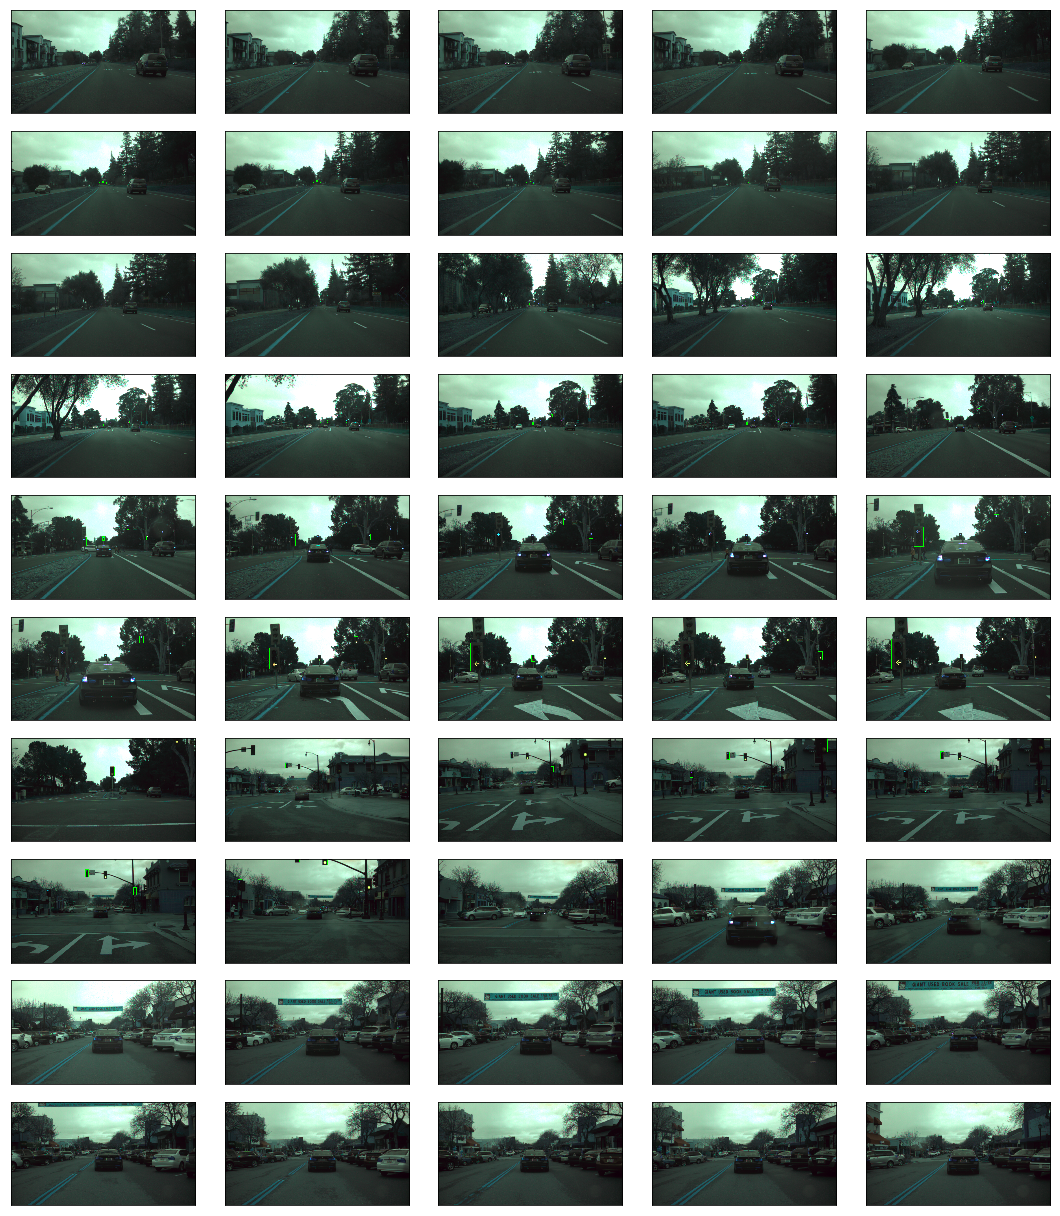

CPU times: user 4.56 s, sys: 1.39 s, total: 5.96 s
Wall time: 4.27 s


In [58]:
%%time
display_images(images)

# Extract data

In [ ]:
# def exttact_images(input_yaml, output_folder):
#     """
#     Extracts labelled pictures of traffic lights.
#     Saves them as separate files in specified output_folder.
#     :param input_yaml: Path to yaml file
#     :param output_folder: path to folder. created if does not exist
#     """
#     images = get_all_labels(input_yaml)

#     assert output_folder is not None
    
#     if not os.path.exists(output_folder):
#         os.makedirs(output_folder)

#     j = 1
#     for i, image_dict in enumerate(images):
#         image = cv2.imread(image_dict['path'])
#         if image is None:
#             raise IOError('Could not open image path', image_dict['path'])

#         for box in image_dict['boxes']:
#             xmin = ir(box['x_min'])
#             ymin = ir(box['y_min'])
#             xmax = ir(box['x_max'])
#             ymax = ir(box['y_max'])
#             if xmax-xmin<=0 or ymax-ymin<=0:
#                 continue
                
#             label = box['label']
#             roi = image[ymin:(ymax+1), xmin:(xmax+1)]
            
#             # save
#             name = str(j).zfill(6) + '_' + label.lower() + '.png'
#             filename = os.path.join(output_folder, name)
#             cv2.imwrite(filename, roi)
            
#             if os.stat(filename).st_size==0:
#               os.remove(filename)
#               print("saved file is zero size, deleting: {} {}".format(i, filename))
#             j += 1
            



In [ ]:
# %%time
# exttact_images(_train_path, EXTRACTED_DATASET_DIR)
# print("Images extracted!")

In [8]:
writer = tf.python_io.TFRecordWriter(FLAGS.output_path)
    
# BOSCH
INPUT_YAML = "data/bosch_dataset/test.yaml"
examples = yaml.load(open(INPUT_YAML, 'rb').read())

#examples = examples[:10]  # for testing
len_examples = len(examples)
print("Loaded ", len(examples), "examples")

for i in range(len(examples)):
    examples[i]['path'] = os.path.abspath(os.path.join(os.path.dirname(INPUT_YAML), examples[i]['path']))

counter = 0
for example in examples:
    tf_example = create_tf_example(example)
    writer.write(tf_example.SerializeToString())

    if counter % 10 == 0:
        print("Percent done", (counter/len_examples)*100)
    counter += 1

writer.close()

NameError: name 'FLAGS' is not defined